# DATASET 

## WEATHER - RAIN PREDICTION

# PROBLEM STATEMENT

### PREDICTING IF IT HAS RAINED TODAY THEN WILL IT RAIN TOMORROW?

### IMPORTING BASIC LIBRARIES

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### IMPORTING ML LIBRARIES

In [79]:
from sklearn import metrics
from sklearn import preprocessing ## for label encoding

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Imputation of num_cols
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer  

# Imputation of cat_cols
from sklearn.impute import SimpleImputer

import datetime

### LOAD DATA

In [80]:
path = "C:/Users/miihi/Data/DecodR/Classification Regression/weatherAUS.csv"
df = pd.read_csv(path)

### UNDERSTANDING DATA
#### SHAPE

In [81]:
print(f"Data has {df.shape[0]} rows and {df.shape[1] } columns")

Data has 145460 rows and 23 columns


#### INFORMATION OF DATATYPES

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### RENAMING COUMNS

In [83]:
df = df.rename(columns= lambda x : x.strip().lower())
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

### CHECKING NUMERICAL AND FACTOR COLUMNS

In [84]:
def splitcols(data):
    num_cols = df.select_dtypes(include= np.number).columns.values
    cat_cols = df.select_dtypes(exclude=np.number).columns.values
    return (num_cols, cat_cols)

### FUNCTION CALLING

In [85]:
num_cols, cat_cols = splitcols(df)
print("NUMERIC COLUMNS ARE:\n", num_cols)
print("\n")
print("FACTOR COLUMNS ARE:\n", cat_cols)

NUMERIC COLUMNS ARE:
 ['mintemp' 'maxtemp' 'rainfall' 'evaporation' 'sunshine' 'windgustspeed'
 'windspeed9am' 'windspeed3pm' 'humidity9am' 'humidity3pm' 'pressure9am'
 'pressure3pm' 'cloud9am' 'cloud3pm' 'temp9am' 'temp3pm']


FACTOR COLUMNS ARE:
 ['date' 'location' 'windgustdir' 'winddir9am' 'winddir3pm' 'raintoday'
 'raintomorrow']


In [86]:
df.date.nunique()

3436

In [14]:
df.location.nunique()

49

### DROPPING THE DATE AND THE LOCATION COLUMN

In [87]:
df = df.drop(['date', 'location'], 1)


In [88]:
df.head(3)

mintemp  maxtemp  rainfall  evaporation  sunshine windgustdir  \
0     13.4     22.9       0.6          NaN       NaN           W   
1      7.4     25.1       0.0          NaN       NaN         WNW   
2     12.9     25.7       0.0          NaN       NaN         WSW   

   windgustspeed winddir9am winddir3pm  windspeed9am  ...  humidity9am  \
0           44.0          W        WNW          20.0  ...         71.0   
1           44.0        NNW        WSW           4.0  ...         44.0   
2           46.0          W        WSW          19.0  ...         38.0   

   humidity3pm  pressure9am  pressure3pm  cloud9am  cloud3pm  temp9am  \
0         22.0       1007.7       1007.1       8.0       NaN     16.9   
1         25.0       1010.6       1007.8       NaN       NaN     17.2   
2         30.0       1007.6       1008.7       NaN       2.0     21.0   

   temp3pm  raintoday raintomorrow  
0     21.8         No           No  
1     24.3         No           No  
2     23.2         No           No  

[3 rows x 21 columns]

### CHECKING FOR NA VALUES


In [89]:
print("\t  Number of NA values:\n", df.isna().sum())

	  Number of NA values:
 mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustdir      10326
windgustspeed    10263
winddir9am       10566
winddir3pm        4228
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
dtype: int64


### IMPUTING NUMERIC COLUMNS USING ITERATIVE IMPUTER- LINEAR REGRESSION() AND CATEGORICAL WITH MODE

### numerical column DF

In [90]:
num_cols_df = pd.DataFrame({'mintemp':df.mintemp, 'maxtemp':df.maxtemp, 'rainfall':df.rainfall,
                           'evaporation':df.evaporation, 'sunshine':df.sunshine,
                           'windgustspeed': df.windgustspeed, 'windspeed9am':df.windspeed9am,
                           'windspeed3pm':df.windspeed3pm, 'humidity9am':df.humidity9am,
                           'humidity3pm':df.humidity3pm, 'pressure9am': df.pressure9am,
                           'pressure3pm':df.pressure3pm, 'cloud9am':df.cloud9am,
                           'cloud3pm':df.cloud3pm, 'temp9am':df.temp9am, 'temp3pm':df.temp3pm})
num_cols_df.head(2)

mintemp  maxtemp  rainfall  evaporation  sunshine  windgustspeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   

   windspeed9am  windspeed3pm  humidity9am  humidity3pm  pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   

   pressure3pm  cloud9am  cloud3pm  temp9am  temp3pm  
0       1007.1       8.0       NaN     16.9     21.8  
1       1007.8       NaN       NaN     17.2     24.3

### imputing NA for Numerical variables

In [91]:
imputed_val = IterativeImputer(estimator= LinearRegression() )
num_cols_df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
              'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am',
              'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm',
              'temp9am', 'temp3pm']] = imputed_val.fit_transform(df[['mintemp', 'maxtemp',
                                                                     'rainfall', 'evaporation',
                                                                     'sunshine', 'windgustspeed',
                                                                     'windspeed9am', 'windspeed3pm', 
                                                                     'humidity9am', 'humidity3pm', 
                                                                     'pressure9am', 'pressure3pm', 
                                                                     'cloud9am', 'cloud3pm',
                                                                     'temp9am', 'temp3pm']])



C:\Users\miihi\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [92]:
num_cols_df.isna().sum()

mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustspeed    0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
dtype: int64

### Factor columns DF

In [93]:
cat_cols_df = pd.DataFrame({'windgustdir':df.windgustdir, 'winddir9am':df.winddir9am,
                            'winddir3pm':df.winddir3pm, 'raintoday':df.raintoday,
                            'raintomorrow':df.raintomorrow})

### imputing NA for categorical variables

In [94]:
mode_imputer = SimpleImputer(strategy='most_frequent')

cat_cols_df[['windgustdir']] = mode_imputer.fit_transform(cat_cols_df[['windgustdir']])
cat_cols_df[['winddir9am']] = mode_imputer.fit_transform(cat_cols_df[['winddir9am']])
cat_cols_df[['winddir3pm']] = mode_imputer.fit_transform(cat_cols_df[['winddir3pm']])
cat_cols_df[['raintoday']] = mode_imputer.fit_transform(cat_cols_df[['raintoday']])
cat_cols_df[['raintomorrow']] = mode_imputer.fit_transform(cat_cols_df[['raintomorrow']])

In [95]:
cat_cols_df.isna().sum()

windgustdir     0
winddir9am      0
winddir3pm      0
raintoday       0
raintomorrow    0
dtype: int64

### Concatenating the numeric and categorical dataframes

In [96]:
df_clean = pd.concat([cat_cols_df,num_cols_df], axis=1)
(df_clean.head())

windgustdir winddir9am winddir3pm raintoday raintomorrow  mintemp  maxtemp  \
0           W          W        WNW        No           No     13.4     22.9   
1         WNW        NNW        WSW        No           No      7.4     25.1   
2         WSW          W        WSW        No           No     12.9     25.7   
3          NE         SE          E        No           No      9.2     28.0   
4           W        ENE         NW        No           No     17.5     32.3   

   rainfall  evaporation   sunshine  ...  windspeed9am  windspeed3pm  \
0       0.6     6.277524   6.993058  ...          20.0          24.0   
1       0.0     6.262259  10.889262  ...           4.0          22.0   
2       0.0     8.590144  11.813438  ...          19.0          26.0   
3       0.0     6.834032  11.591181  ...          11.0           9.0   
4       1.0     7.361838   5.493859  ...           7.0          20.0   

   humidity9am  humidity3pm  pressure9am  pressure3pm  cloud9am  cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  5.148880   
1         44.0         25.0       1010.6       1007.8  1.896527  2.624583   
2         38.0         30.0       1007.6       1008.7  2.015678  2.000000   
3         45.0         16.0       1017.6       1012.8  1.175041  1.965274   
4         82.0         33.0       1010.8       1006.0  7.000000  8.000000   

   temp9am  temp3pm  
0     16.9     21.8  
1     17.2     24.3  
2     21.0     23.2  
3     18.1     26.5  
4     17.8     29.7  

[5 rows x 21 columns]

In [25]:
df_clean.isna().sum().sum()

0

### Creating Heatmap for numerical variables to understand the correlation


In [97]:
num_cols, cat_cols = splitcols(df_clean)
print(num_cols, "\n\n", cat_cols)

['mintemp' 'maxtemp' 'rainfall' 'evaporation' 'sunshine' 'windgustspeed'
 'windspeed9am' 'windspeed3pm' 'humidity9am' 'humidity3pm' 'pressure9am'
 'pressure3pm' 'cloud9am' 'cloud3pm' 'temp9am' 'temp3pm'] 

 ['windgustdir' 'winddir9am' 'winddir3pm' 'raintoday' 'raintomorrow']


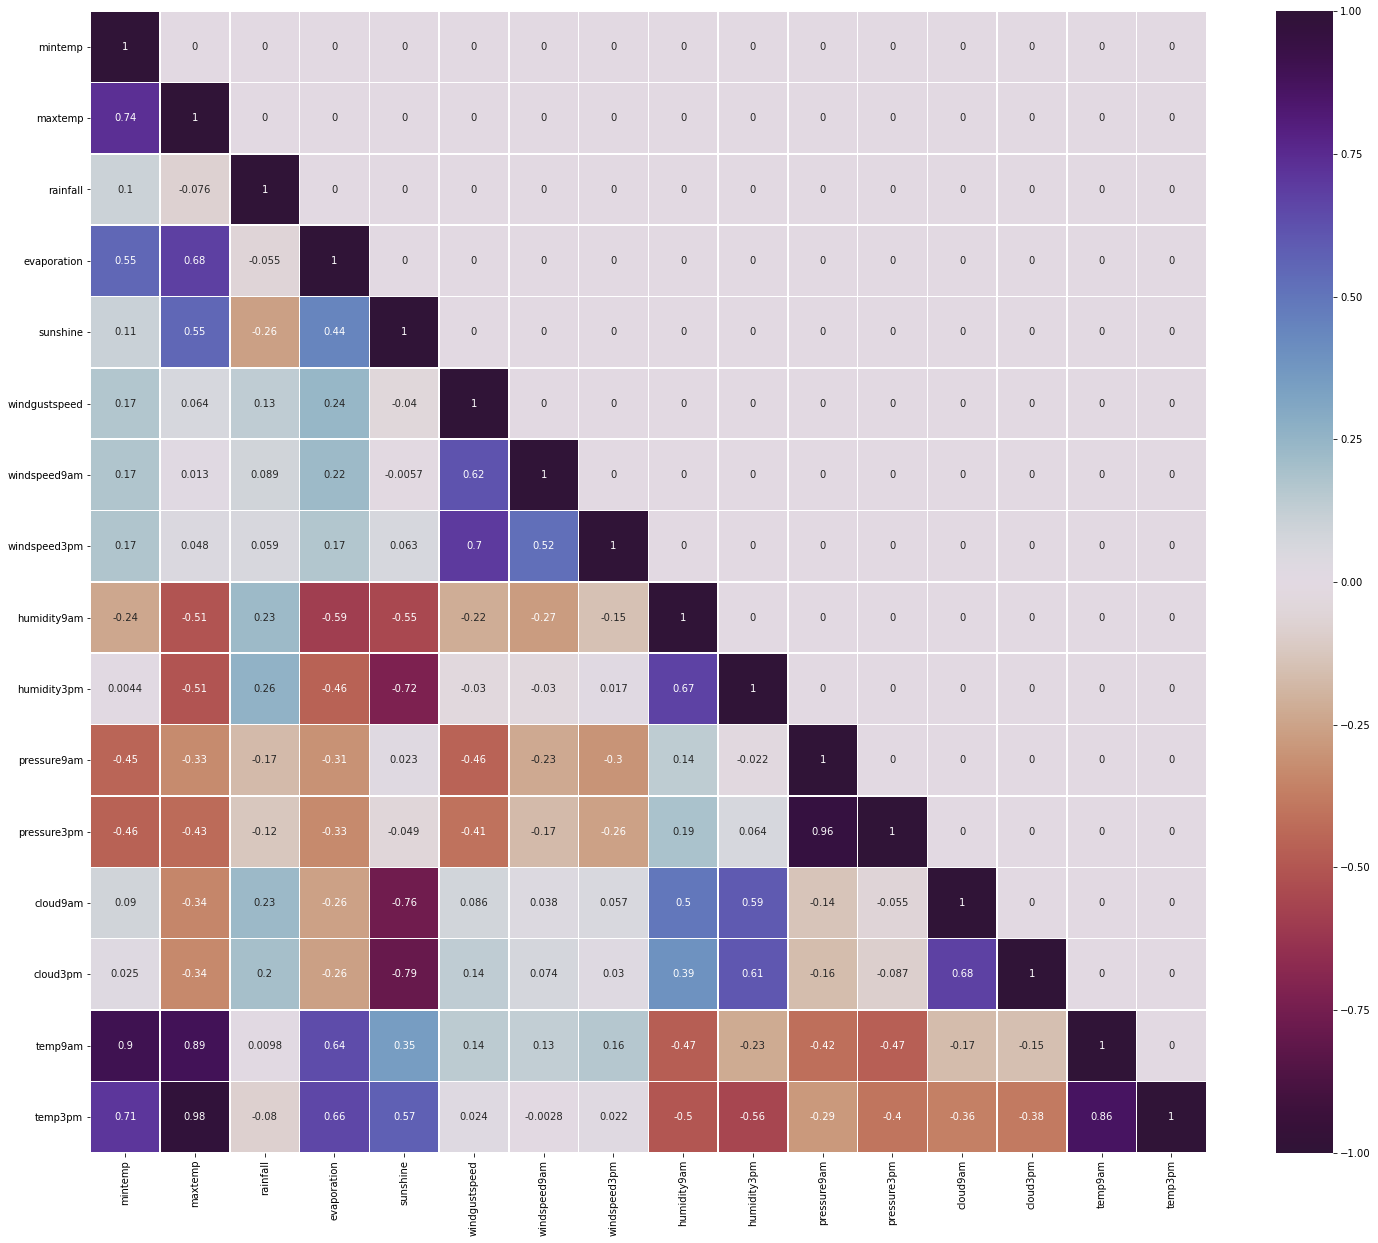

In [59]:
plt.figure(figsize=(25, 21))
cor = df_clean[num_cols].corr()
cor = np.tril(cor)
ax = sns.heatmap(data = cor, annot = True, vmin = -1, vmax = 1, cmap = "twilight_shifted_r",
                linewidth = 0.5, linecolor = "white", xticklabels= num_cols,
                yticklabels=num_cols)

**'temp9am' and 'temp3pm'** have a **high positive correlation** of **0.86**

**'maxtemp' and 'temp3pm'** have a **high positive correlation** of **0.98**

**'mintemp' and 'temp9am'** have a **high positive correlation** of **0.90**

**'pressure9am' and 'pressure3pm'** have a **high positive correlation** of **0.96**

**'cloud3pm' and 'sunshine' have a **moderate negative correlateion** of **0.79**

**'cloud9am' and 'sunshine' have a **moderate negative correlateion** of **0.76**

**'humidity3pm' and 'sunshine' have a **moderate negative correlateion** of **0.72**

<Figure size 2520x2520 with 0 Axes>

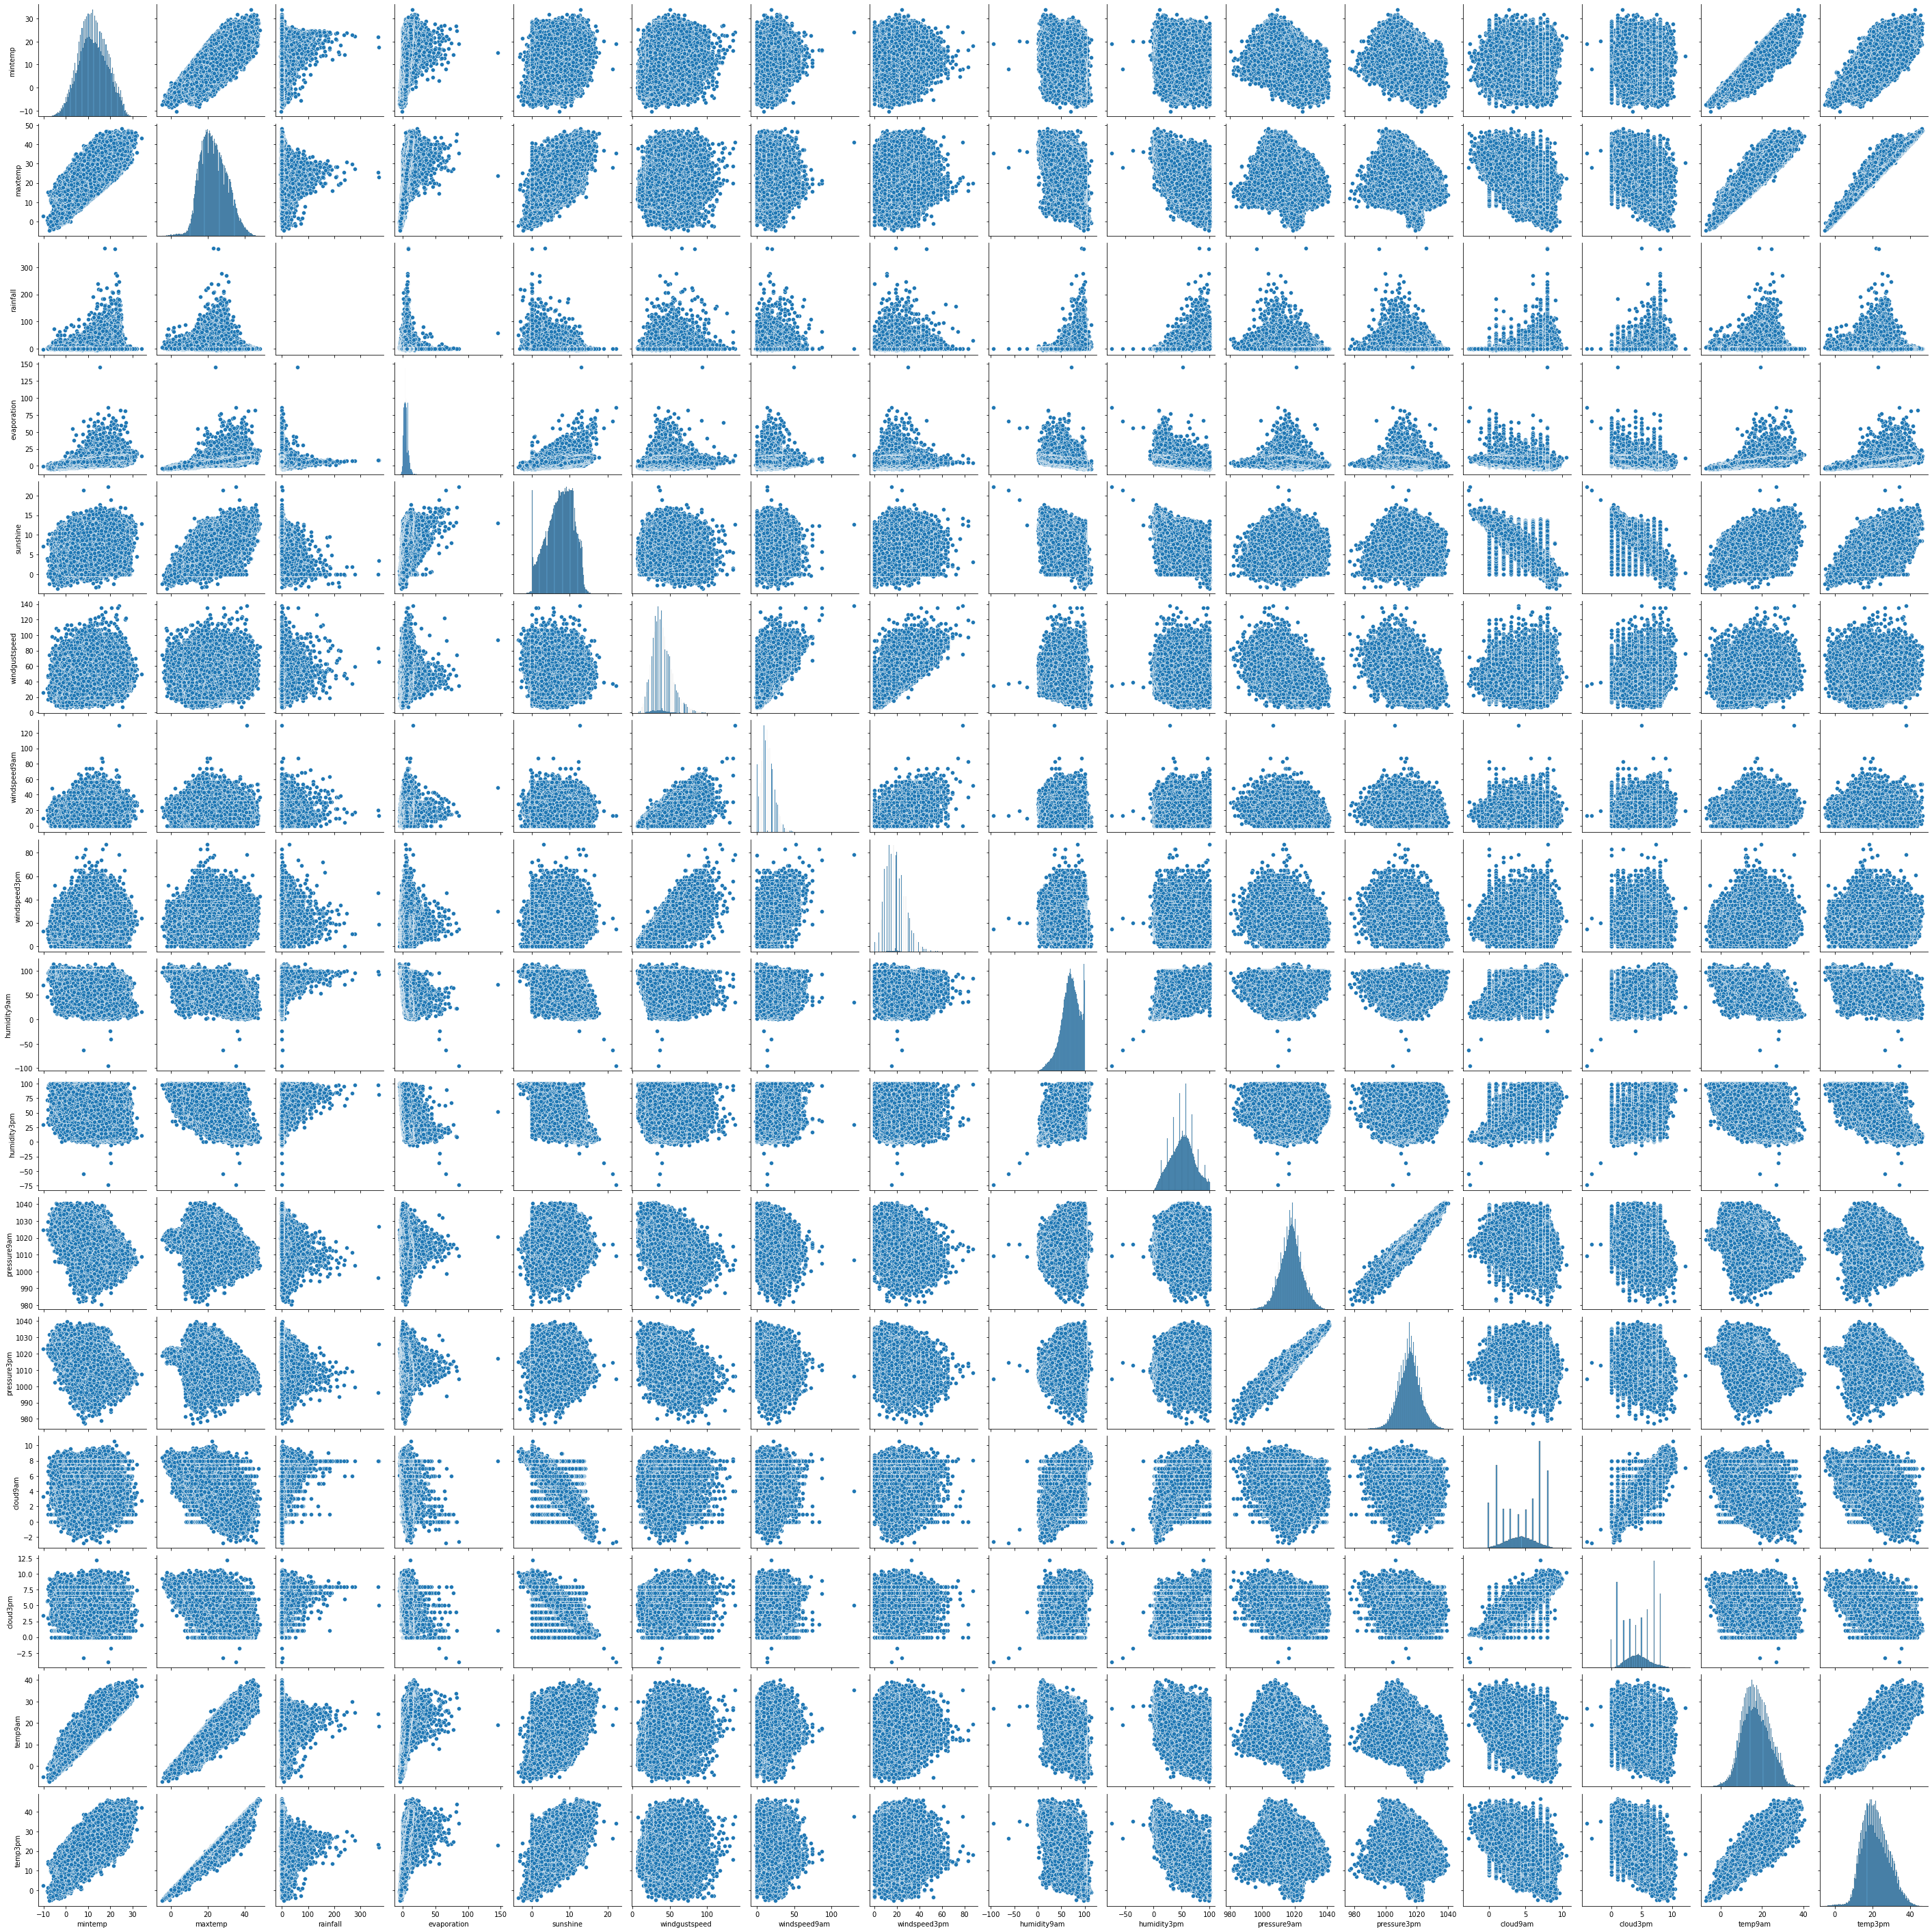

In [60]:
plt.figure(figsize=(35,35))
sns.pairplot(data = df_clean[num_cols])

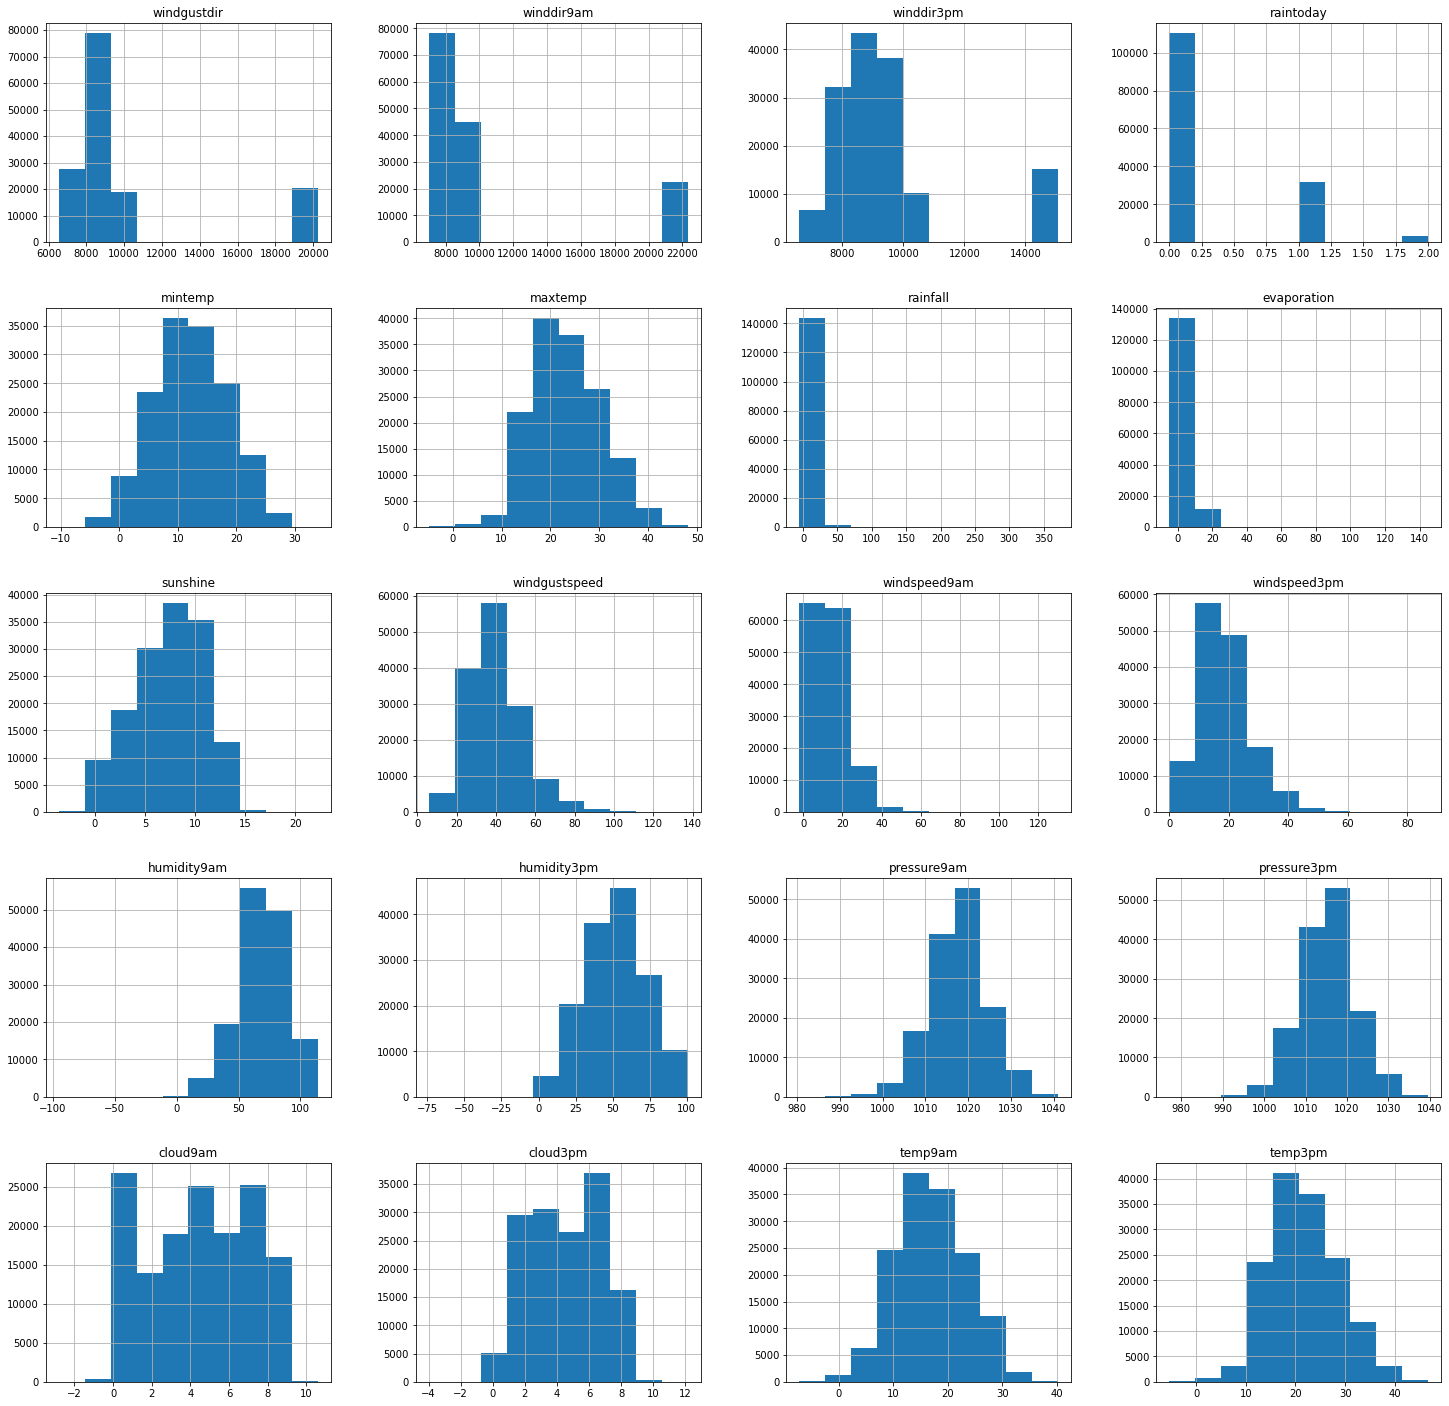

In [125]:
df_clean.hist(figsize=(25,25))
plt.show()

### HANDLING FACTOR VARIABLES

In [98]:
df_clean[cat_cols].columns

Index(['windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow'], dtype='object')

In [99]:
print(df_clean.windgustdir.unique())   
print(df_clean.windgustdir.nunique())
## multiple categories, hence Label Encoding is not suitable

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
16


In [100]:
print(df_clean.winddir3pm.unique())   
print(df_clean.winddir3pm.nunique())
## multiple categories, hence Label Encoding is not suitable


['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
16


In [101]:
print(df_clean.winddir9am.unique())   
print(df_clean.winddir9am.nunique())
## multiple categories, hence Label Encoding is not suitable

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
16


In [102]:
print(df_clean.raintoday.unique())  
print(df_clean.raintoday.nunique())
## Binary classification, hence Label Encoding is suitable

['No' 'Yes']
2


In [103]:
print(df_clean.raintomorrow.unique())   
print(df_clean.raintomorrow.nunique())
## Binary classification, hence Label Encoding is suitable

['No' 'Yes']
2


## COUNT-FREQUENCY ENCODING
For 'windgustdir', 'winddir9am', 'winddir3pm' columns.

In [104]:
cat_cols_df_clean = pd.DataFrame({'windgustdir':df_clean.windgustdir,
                                  'winddir9am':df_clean.winddir9am, 
                                  'winddir3pm':df_clean.winddir3pm})

In [105]:
for col in cat_cols_df_clean.columns[0: ]:
    print(col, ":", len(cat_cols_df_clean[col].unique()), 'labels')

windgustdir : 16 labels
winddir9am : 16 labels
winddir3pm : 16 labels


In [106]:
# obtaining the count of each label in each column
# convert it to dictionary so it can be re - mapped in the labels in the df_clean

print(df_clean.windgustdir.value_counts().to_dict())
print(df_clean.winddir9am.value_counts().to_dict())
print(df_clean.winddir3pm.value_counts().to_dict())

{'W': 20241, 'SE': 9418, 'N': 9313, 'SSE': 9216, 'E': 9181, 'S': 9168, 'WSW': 9069, 'SW': 8967, 'SSW': 8736, 'WNW': 8252, 'NW': 8122, 'ENE': 8104, 'ESE': 7372, 'NE': 7133, 'NNW': 6620, 'NNE': 6548}
{'N': 22324, 'SE': 9287, 'E': 9176, 'SSE': 9112, 'NW': 8749, 'S': 8659, 'W': 8459, 'SW': 8423, 'NNE': 8129, 'NNW': 7980, 'ENE': 7836, 'NE': 7671, 'ESE': 7630, 'SSW': 7587, 'WNW': 7414, 'WSW': 7024}
{'SE': 15066, 'W': 10110, 'S': 9926, 'WSW': 9518, 'SSE': 9399, 'SW': 9354, 'N': 8890, 'WNW': 8874, 'NW': 8610, 'ESE': 8505, 'E': 8472, 'NE': 8263, 'SSW': 8156, 'NNW': 7870, 'ENE': 7857, 'NNE': 6590}


In [107]:
# The above dictionary values are stored in a variable to map with df_clean

windgustdir_freq_map = df_clean.windgustdir.value_counts().to_dict()
winddir9am_freq_map = df_clean.winddir9am.value_counts().to_dict()
winddir3pm_freq_map = df_clean.winddir3pm.value_counts().to_dict()

In [108]:
# mapping the dictionaries to the df_clean dataframe

df_clean.windgustdir = df_clean.windgustdir.map(windgustdir_freq_map)
df_clean.winddir9am = df_clean.winddir9am.map(winddir9am_freq_map)
df_clean.winddir3pm = df_clean.winddir3pm.map(winddir3pm_freq_map)

In [109]:
df_clean.head()

windgustdir  winddir9am  winddir3pm raintoday raintomorrow  mintemp  \
0        20241        8459        8874        No           No     13.4   
1         8252        7980        9518        No           No      7.4   
2         9069        8459        9518        No           No     12.9   
3         7133        9287        8472        No           No      9.2   
4        20241        7836        8610        No           No     17.5   

   maxtemp  rainfall  evaporation   sunshine  ...  windspeed9am  windspeed3pm  \
0     22.9       0.6     6.277524   6.993058  ...          20.0          24.0   
1     25.1       0.0     6.262259  10.889262  ...           4.0          22.0   
2     25.7       0.0     8.590144  11.813438  ...          19.0          26.0   
3     28.0       0.0     6.834032  11.591181  ...          11.0           9.0   
4     32.3       1.0     7.361838   5.493859  ...           7.0          20.0   

   humidity9am  humidity3pm  pressure9am  pressure3pm  cloud9am  cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  5.148880   
1         44.0         25.0       1010.6       1007.8  1.896527  2.624583   
2         38.0         30.0       1007.6       1008.7  2.015678  2.000000   
3         45.0         16.0       1017.6       1012.8  1.175041  1.965274   
4         82.0         33.0       1010.8       1006.0  7.000000  8.000000   

   temp9am  temp3pm  
0     16.9     21.8  
1     17.2     24.3  
2     21.0     23.2  
3     18.1     26.5  
4     17.8     29.7  

[5 rows x 21 columns]

### Label encoding
**For raintoday and raintomorrow** columns

In [110]:
label_encoder = preprocessing.LabelEncoder()

df_clean['raintoday'] = label_encoder.fit_transform(df_clean['raintoday'])
df_clean.raintoday.head()

0    0
1    0
2    0
3    0
4    0
Name: raintoday, dtype: int32

In [111]:
df_clean['raintomorrow'] = label_encoder.fit_transform(df_clean['raintomorrow'])
df_clean.raintomorrow.head()

0    0
1    0
2    0
3    0
4    0
Name: raintomorrow, dtype: int32

In [112]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   windgustdir    145460 non-null  int64  
 1   winddir9am     145460 non-null  int64  
 2   winddir3pm     145460 non-null  int64  
 3   raintoday      145460 non-null  int32  
 4   raintomorrow   145460 non-null  int32  
 5   mintemp        145460 non-null  float64
 6   maxtemp        145460 non-null  float64
 7   rainfall       145460 non-null  float64
 8   evaporation    145460 non-null  float64
 9   sunshine       145460 non-null  float64
 10  windgustspeed  145460 non-null  float64
 11  windspeed9am   145460 non-null  float64
 12  windspeed3pm   145460 non-null  float64
 13  humidity9am    145460 non-null  float64
 14  humidity3pm    145460 non-null  float64
 15  pressure9am    145460 non-null  float64
 16  pressure3pm    145460 non-null  float64
 17  cloud9am       145460 non-nul

#### SEPERATING DEPENDENT AND INDEPENDENT VARIABLES

In [113]:
y = df_clean.raintomorrow
y = y.to_frame()
y.head()

raintomorrow
0             0
1             0
2             0
3             0
4             0

In [114]:
df_clean = df_clean.drop(['raintomorrow'], axis = 1)
df_clean.columns

Index(['windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'mintemp',
       'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'windgustspeed',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm'],
      dtype='object')

In [115]:
x = df_clean[ : ]
x.head(10)

windgustdir  winddir9am  winddir3pm  raintoday  mintemp  maxtemp  rainfall  \
0        20241        8459        8874          0     13.4     22.9       0.6   
1         8252        7980        9518          0      7.4     25.1       0.0   
2         9069        8459        9518          0     12.9     25.7       0.0   
3         7133        9287        8472          0      9.2     28.0       0.0   
4        20241        7836        8610          0     17.5     32.3       1.0   
5         8252        8459       10110          0     14.6     29.7       0.2   
6        20241        8423       10110          0     14.3     25.0       0.0   
7        20241        9112       10110          0      7.7     26.7       0.0   
8         6620        9287        8610          0      9.7     31.9       0.0   
9        20241        8659        9399          1     13.1     30.1       1.4   

   evaporation   sunshine  windgustspeed  windspeed9am  windspeed3pm  \
0     6.277524   6.993058           44.0          20.0          24.0   
1     6.262259  10.889262           44.0           4.0          22.0   
2     8.590144  11.813438           46.0          19.0          26.0   
3     6.834032  11.591181           24.0          11.0           9.0   
4     7.361838   5.493859           41.0           7.0          20.0   
5     7.985531  10.202881           56.0          19.0          24.0   
6     7.956667  11.564234           50.0          20.0          24.0   
7     6.608935  11.406320           35.0           6.0          17.0   
8     9.032332  11.396017           80.0           7.0          28.0   
9     7.715642  10.757210           28.0          15.0          11.0   

   humidity9am  humidity3pm  pressure9am  pressure3pm  cloud9am  cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  5.148880   
1         44.0         25.0       1010.6       1007.8  1.896527  2.624583   
2         38.0         30.0       1007.6       1008.7  2.015678  2.000000   
3         45.0         16.0       1017.6       1012.8  1.175041  1.965274   
4         82.0         33.0       1010.8       1006.0  7.000000  8.000000   
5         55.0         23.0       1009.2       1005.4  3.076299  3.109383   
6         49.0         19.0       1009.6       1008.2  1.000000  1.813666   
7         48.0         19.0       1013.4       1010.1  1.693744  2.227650   
8         42.0          9.0       1008.9       1003.6  1.705386  2.613453   
9         58.0         27.0       1007.0       1005.7  2.729206  3.156619   

   temp9am  temp3pm  
0     16.9     21.8  
1     17.2     24.3  
2     21.0     23.2  
3     18.1     26.5  
4     17.8     29.7  
5     20.6     28.9  
6     18.1     24.6  
7     16.3     25.5  
8     18.3     30.2  
9     20.1     28.2

#### DISTRIBUTION OF DEPENDENT VARIABLE

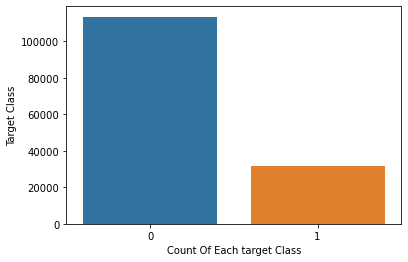

In [116]:
sns.countplot(x = y.raintomorrow, data = y)
plt.xlabel("Count Of Each target Class")
plt.ylabel("Target Class")
plt.show()

**target variable seems to be biased towards class - 0**

### FEATURE SCALING INDEPENDENT VARIABLES

In [117]:
sc= StandardScaler()

x = sc.fit_transform(x)


SCALING converts the x dataframe into a numpy array.

so we convert it backto  dataframe

In [118]:
x = pd.DataFrame(x, columns=df_clean.columns)

In [119]:
x.head()

windgustdir  winddir9am  winddir3pm  raintoday   mintemp   maxtemp  \
0     2.434305   -0.384460   -0.268802  -0.529795  0.188386 -0.045283   
1    -0.443402   -0.478284    0.041081  -0.529795 -0.752001  0.264686   
2    -0.247298   -0.384460    0.041081  -0.529795  0.110020  0.349223   
3    -0.711994   -0.222276   -0.462239  -0.529795 -0.469885  0.673282   
4     2.434305   -0.506490   -0.395835  -0.529795  0.830983  1.279132   

   rainfall  evaporation  sunshine  windgustspeed  windspeed9am  windspeed3pm  \
0 -0.211629     0.321110 -0.119993       0.310843      0.671286      0.610676   
1 -0.283107     0.316992  1.000585       0.310843     -1.131437      0.382134   
2 -0.283107     0.945005  1.266386       0.459062      0.558615      0.839219   
3 -0.283107     0.471244  1.202463      -1.171352     -0.342746     -1.103395   
4 -0.163978     0.613635 -0.551175       0.088514     -0.793426      0.153591   

   humidity9am  humidity3pm  pressure9am  pressure3pm  cloud9am  cloud3pm  \
0     0.108001    -1.429437    -1.479214    -1.225319  1.417322  0.277759   
1    -1.313886    -1.284651    -1.051358    -1.121090 -0.977416 -0.790348   
2    -1.629862    -1.043339    -1.493968    -0.987081 -0.930666 -1.054627   
3    -1.261224    -1.719011    -0.018601    -0.376595 -1.260496 -1.069321   
4     0.687289    -0.898552    -1.021850    -1.389108  1.024966  1.484153   

    temp9am   temp3pm  
0 -0.010081  0.013035  
1  0.036141  0.372354  
2  0.621614  0.214254  
3  0.174806  0.688555  
4  0.128584  1.148484

# MODEL BUILDING

### SPLITTING THE DATA

In [120]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 500)

In [121]:
print(f"x_train has {x_train.shape[0]} rows and {x_train.shape[1]} columns")
print("\n")
print(f"x_test has {x_test.shape[0]} rows and {x_test.shape[1]} columns")
print("\n")
print(f"y_train has {y_train.shape[0]} rows and {y_train.shape[1]} columns")
print("\n")
print(f"y_test has {y_test.shape[0]} rows and {y_test.shape[1]} columns")


x_train has 101822 rows and 20 columns


x_test has 43638 rows and 20 columns


y_train has 101822 rows and 1 columns


y_test has 43638 rows and 1 columns


## LOGISTIC REGRESSION MODEL

In [122]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

y_pred = log_reg_model.predict(x_test)

probs = log_reg_model.predict_proba(x_test)

## ACCURACY OF THE MODEL
log_reg_score = log_reg_model.score(x_test, y_test)
print("ACCURACY SCORE: ", log_reg_score)

C:\Users\miihi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ACCURACY SCORE:  0.8470599019203446


## CONFUSION MATRIX

In [123]:
actual = y_test
predicted = y_pred

conf_mat = confusion_matrix(actual, predicted)
print("CONFUSION MATRIX:\n", conf_mat)
print("\n")

report = classification_report(actual, predicted)
print("REPORT:\n", report)


CONFUSION MATRIX:
 [[32374  1838]
 [ 4836  4590]]


REPORT:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     34212
           1       0.71      0.49      0.58      9426

    accuracy                           0.85     43638
   macro avg       0.79      0.72      0.74     43638
weighted avg       0.84      0.85      0.84     43638



# KNN CLASSICFICATION

In [124]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

C:\Users\miihi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [125]:
 knn_y_pred = knn_model.predict(x_test)

knn_probs = knn_model.predict_proba(x_test)

knn_score = knn_model.score(x_test, y_test)
print("KNN MODEL SCORE =", knn_score)

KNN MODEL SCORE = 0.8366332095879738


## CONFUSION MATRIX

In [126]:
ACTUAL = y_pred
PREDICTED = knn_y_pred

knn_conf_mat = confusion_matrix(ACTUAL, PREDICTED)
print("CONFUSION MATRIX:\n", knn_conf_mat)
print("\n")

knn_report = classification_report(ACTUAL, PREDICTED)

print("REPORT:\n", knn_report)


CONFUSION MATRIX:
 [[34948  2262]
 [ 1767  4661]]


REPORT:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     37210
           1       0.67      0.73      0.70      6428

    accuracy                           0.91     43638
   macro avg       0.81      0.83      0.82     43638
weighted avg       0.91      0.91      0.91     43638



### FINDING BEST NEIGHBOURS

In [134]:
k_list = list(range(1,26))
score_list = []

for i in k_list:
    knn_model_i = KNeighborsClassifier(n_neighbors=i)
    knn_model_i.fit(x_train, y_train)
    knn_y_pred_i = knn_model_i.predict(x_test)
    knn_score_i = metrics.accuracy_score(y_test, knn_y_pred_i)
    
    score_list.append(knn_score_i)  
    

C:\Users\miihi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\miihi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\miihi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\miihi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [135]:
print(np.round(score_list, 3))

[0.798 0.826 0.827 0.835 0.837 0.838 0.841 0.841 0.842 0.842 0.844 0.844
 0.845 0.844 0.844 0.845 0.846 0.845 0.846 0.845 0.846 0.844 0.845 0.845
 0.846]


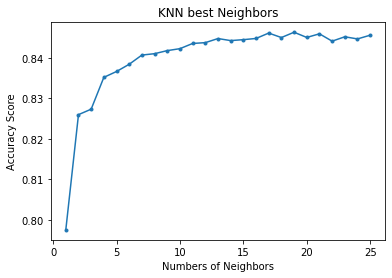

In [136]:
plt.plot(k_list, score_list, marker = ".")
plt.xlabel("Numbers of Neighbors")
plt.ylabel("Accuracy Score")
plt.title("KNN best Neighbors")
plt.show()

So we can see that the maximum accuracu can be obtained for 17 neighbors. 

### FINAL MODEL

In [137]:
knn_final = KNeighborsClassifier(n_neighbors=17)
knn_final_model = knn_final.fit(x_train, y_train)

C:\Users\miihi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [139]:
y_pred_final = knn_final_model.predict(x_test)
knn_score_final = knn_final_model.score(x_test, y_test)
print("Final KNN score:", knn_score_final)
print("\n")

Actual = y_test
Predicted = y_pred_final

knn_cunfusion_matrix = confusion_matrix(Actual, Predicted)
print("Final Confusion Matrix:\n", knn_cunfusion_matrix)
print("\n")

knn_report_final = classification_report(Actual, Predicted)

print("Final Report:\n", knn_report_final)

Final KNN score: 0.8461203538200651


Final Confusion Matrix:
 [[32562  1650]
 [ 5065  4361]]


Final Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     34212
           1       0.73      0.46      0.57      9426

    accuracy                           0.85     43638
   macro avg       0.80      0.71      0.74     43638
weighted avg       0.84      0.85      0.83     43638

